In [1]:
import cv2
import os
import pandas as pd
from skimage import segmentation
import numpy as np
from datetime import datetime

In [2]:
df1 = pd.read_csv("/home/datadisk/pipe/results/sam_box/toy_set_sample/segmentation_toyset_5414/output.csv")#'/home/datadisk/pipe/results/sam_box/output.csv')
df = df1
df

,image_path,class,roi,dice,path,gt_path
0,/goss/Datasets/LoveDA/Val/Rural/images_png/318...,agriculture area,"[560, 0, 956, 359]",0.731920,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
1,/goss/Datasets/LoveDA/Val/Rural/images_png/303...,agriculture area,"[995, 0, 1023, 337]",0.857986,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
2,/goss/Datasets/LoveDA/Val/Rural/images_png/329...,agriculture area,"[155, 38, 495, 370]",0.863911,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
3,/goss/Datasets/LoveDA/Val/Urban/images_png/368...,agriculture area,"[320, 30, 644, 215]",0.670620,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
4,/goss/Datasets/LoveDA/Val/Urban/images_png/391...,agriculture area,"[0, 523, 24, 721]",0.418860,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
5,/goss/Datasets/LoveDA/Val/Rural/images_png/349...,agriculture area,"[301, 544, 415, 690]",0.928267,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
6,/goss/Datasets/LoveDA/Val/Rural/images_png/256...,agriculture area,"[0, 435, 804, 823]",0.855169,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
7,/goss/Datasets/LoveDA/Val/Rural/images_png/350...,agriculture area,"[965, 969, 1030, 1030]",0.908317,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
8,/goss/Datasets/LoveDA/Val/Urban/images_png/383...,agriculture area,"[55, 0, 537, 391]",0.909457,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...
9,/goss/Datasets/LoveDA/Val/Rural/images_png/262...,agriculture area,"[424, 0, 1023, 685]",0.771271,/home/datadisk/pipe/results/sam_box/toy_set/se...,/home/datadisk/pipe/results/sam_box/toy_set/se...


In [50]:
img =cv2.imread(df.loc[19]['image_path'])
print (int(img.shape[0]*img.shape[1]/500))
slic = segmentation.slic(img, n_segments=int(img.shape[0]*img.shape[1]/500), compactness=13, max_num_iter=10, start_label=1)


2097


# Save SLIC

In [ ]:
image_paths = []
#save
output_folder = "/home/datadisk/pipe/results/slic/"
os.makedirs(output_folder, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")
filename = f"{timestamp}_SLIC.npy"
filepath = os.path.join(output_folder, filename)

np.save(filepath, slic)
image_paths.append(filepath)

# Create a DataFrame to store the image paths
df_slic = pd.DataFrame({"segment_path": image_paths})

# Save the DataFrame to a CSV file
df_slic.to_csv("/home/datadisk/pipe/results/slic_segments.csv", index=False)

# Visualizationn

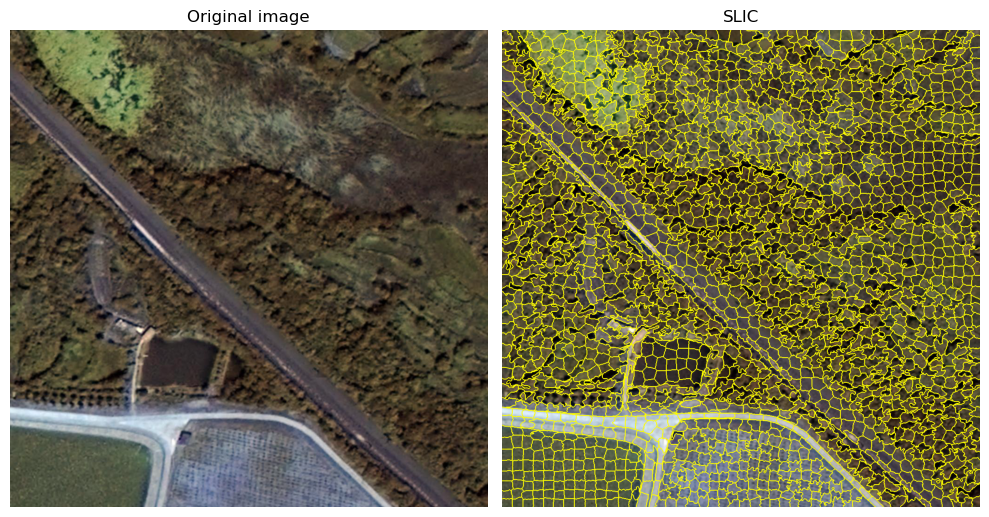

In [55]:
fig, ax_arr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax3 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax3.imshow(segmentation.mark_boundaries(img, slic_masks[0]))
ax3.set_title('SLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# load slic

In [52]:
import pandas as pd
import cv2

# Load the CSV file containing the paths of the SLIC mask images
csv_path = "/home/datadisk/pipe/results/slic_segments.csv"
df_slic = pd.read_csv(csv_path)

# Initialize a list to store the loaded SLIC mask images
slic_masks = []

# Iterate through the DataFrame and load each SLIC mask image
for index, row in df_slic.iterrows():
    mask_path = row['segment_path']  # Get the path of the SLIC mask image
    mask_image = np.load(mask_path)
    if mask_image is not None:
        slic_masks.append(mask_image)  # Add the loaded image to the list
    else:
        print(f"Warning: Unable to load image at {mask_path}")

# Now `slic_masks` contains all the loaded SLIC mask images
print(f"Loaded {len(slic_masks)} SLIC mask images.")

Loaded 1 SLIC mask images.


array([[   1,    1,    1, ...,   41,   41,   41],
       [   1,    1,    1, ...,   41,   41,   41],
       [   1,    1,    1, ...,   41,   41,   41],
       ...,
       [2101, 2101, 2101, ..., 2074, 2074, 2074],
       [2101, 2101, 2101, ..., 2074, 2074, 2074],
       [2101, 2101, 2101, ..., 2074, 2074, 2074]])

IndexError: list index out of range